In [1]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

# basic tools
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
PATH = '/home/disk/orca/adaley17/MLGEO2024_TC_Tracks_Intensity/data/'
bt_data = 'clean/cleaned_best_track_data.csv'
ships_data = 'ai_ready/ai_ready_SHIPS_data.csv'

df_SHIPS = pd.read_csv(os.path.join(PATH, ships_data))
df_BT = pd.read_csv(os.path.join(PATH, bt_data))

In [3]:
df_SHIPS


,Original_Times,Code,Times,Daily_SST_Avg,Mid_Level_RH,Vert_Vel,Vshear,MSLP,Vmax,Latitude,Longitude
0,1982-06-02 12:00:00,AL011982,-12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1982-06-02 12:00:00,AL011982,-6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1982-06-02 12:00:00,AL011982,0.0,27.1,57.0,6.631183,15.227542,1005.0,10.28888,21.7,87.1
3,1982-06-02 12:00:00,AL011982,6.0,27.8,53.0,3.966363,15.536209,1004.0,12.86110,22.2,86.5
4,1982-06-02 12:00:00,AL011982,12.0,27.9,56.0,4.403641,15.330431,1003.0,15.43332,22.6,85.8
...,...,...,...,...,...,...,...,...,...,...,...
318545,2022-11-11 12:00:00,AL172022,96.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
318546,2022-11-11 12:00:00,AL172022,102.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
318547,2022-11-11 12:00:00,AL172022,108.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
318548,2022-11-11 12:00:00,AL172022,114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_BT.head()

,ISO_TIME,USA_ATCF_ID,NAME,DIST2LAND,LANDFALL,STORM_SPEED,STORM_DIR,USA_LAT,USA_LON,USA_WIND,WMO_WIND,WMO_PRES,USA_PRES,USA_RMW,USA_WSPD
0,1982-06-02 12:00:00,AL011982,ALBERTO,22,40744.0,3.601108,47,21.7000,-87.1000,10.288880,10.28888,1005,1005.0,NaN,10.288880
1,1982-06-02 15:00:00,AL011982,ALBERTO,59,109268.0,4.115552,48,21.9551,-86.8077,11.317768,NaN,,1004.0,NaN,11.317768
2,1982-06-02 18:00:00,AL011982,ALBERTO,93,172236.0,4.115552,52,22.2000,-86.5000,12.861100,12.86110,1004,1004.0,NaN,12.861100
3,1982-06-02 21:00:00,AL011982,ALBERTO,130,209276.0,4.115552,58,22.4224,-86.1650,13.889988,NaN,,1003.0,NaN,13.889988
4,1982-06-03 00:00:00,AL011982,ALBERTO,113,181496.0,4.115552,68,22.6000,-85.8000,15.433320,15.43332,1003,1003.0,NaN,15.433320


## Attempting to use BT Data as verification

### Subsetting the first 30 hours of BT and SHIPS Data

In [5]:
# Subsampling the data so that we only have the first 24 hours of each storm
df_BT_24 = df_BT.groupby('USA_ATCF_ID').head(30) #This will be our Obseravtion data


# Filter the DataFrame for Times from 0 to 24 for each Code
filtered_df = df_SHIPS[(df_SHIPS['Times'] >= 0) & (df_SHIPS['Times'] <= 30)]

# Group by Code and extract the relevant columns
df_SHIPS_24 = filtered_df.groupby('Code').apply(lambda x: x[['Original_Times', 'Code', 'Times', 'Latitude', 'Longitude', 'Vmax', 'MSLP', 'Daily_SST_Avg', 'Mid_Level_RH', 'Vshear', 'Vert_Vel']]).reset_index(drop=True)

# df_SHIPS_24


<ipython-input-5-70ef97ec7642>:9: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_SHIPS_24 = filtered_df.groupby('Code').apply(lambda x: x[['Original_Times', 'Code', 'Times', 'Latitude', 'Longitude', 'Vmax', 'MSLP', 'Daily_SST_Avg', 'Mid_Level_RH', 'Vshear', 'Vert_Vel']]).reset_index(drop=True)


### Identifying common codes across datasets

In [6]:
# Set 'Code' as an index level in df_SHIPS_24
df_SHIPS_24 = df_SHIPS_24.set_index('Code')

# Extract the unique IDs from both dataframes
bt_ids = df_BT_24['USA_ATCF_ID'].unique()
ships_ids = df_SHIPS_24.index.get_level_values('Code').unique()

# Find common IDs
common_ids = np.intersect1d(bt_ids, ships_ids)

# Find IDs only in df_BT_24
bt_only_ids = np.setdiff1d(bt_ids, ships_ids)

# Find IDs only in df_SHIPS_24
ships_only_ids = np.setdiff1d(ships_ids, bt_ids)

print(f"Common IDs: {len(common_ids)}")
print(f"IDs only in df_BT_24: {len(bt_only_ids)}")
print(f"IDs only in df_SHIPS_24: {len(ships_only_ids)}")



Common IDs: 539
IDs only in df_BT_24: 23
IDs only in df_SHIPS_24: 71


### Keeping Common IDs

In [7]:
# Filter df_BT_24 to keep only common IDs
df_BT_24_common = df_BT_24[df_BT_24['USA_ATCF_ID'].isin(common_ids)]

# Filter df_SHIPS_24 to keep only common IDs
df_SHIPS_24_common = df_SHIPS_24[df_SHIPS_24.index.get_level_values('Code').isin(common_ids)]

# Check if the lengths of the filtered dataframes are the same
print(f"Length of df_BT_24_common: {len(df_BT_24_common)}")
print(f"Length of df_SHIPS_24_common: {len(df_SHIPS_24_common)}")

Length of df_BT_24_common: 15287
Length of df_SHIPS_24_common: 79440


### Matching Times

In [8]:
new_times = [None] * len(df_SHIPS_24_common['Original_Times']) #Empty list to store the new times
for i in range(len(df_SHIPS_24_common['Original_Times'])):
    
    original_time = pd.to_datetime(df_SHIPS_24_common['Original_Times'].iloc[i]) #Time when prediction was made

    # print(original_time, original_time + pd.Timedelta(hours=df_SHIPS_24_common['Times'].iloc[i]))
    new_times[i] = original_time + pd.Timedelta(hours=df_SHIPS_24_common['Times'].iloc[i]) #Add the time of prediction to the time when prediction was made

    
df_SHIPS_24_common.loc[:, 'New_Times'] = new_times #Add the new times to the DataFrame

<ipython-input-8-72a982439e21>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SHIPS_24_common.loc[:, 'New_Times'] = new_times #Add the new times to the DataFrame


In [9]:
df_SHIPS_24_common

# Convert ISO_TIME to datetime format
df_BT_24_common['ISO_TIME'] = pd.to_datetime(df_BT_24_common['ISO_TIME'])

df_merged = pd.merge(df_SHIPS_24_common.reset_index(), 
df_BT_24_common[['ISO_TIME', 'USA_ATCF_ID', 'USA_WSPD', 'USA_PRES', 
                    'WMO_WIND', 'USA_WIND', 'STORM_DIR', 'WMO_PRES']], 
            left_on=['New_Times', 'Code'], right_on=['ISO_TIME', 'USA_ATCF_ID'], how='inner')

<ipython-input-9-cfb0873efbe0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BT_24_common['ISO_TIME'] = pd.to_datetime(df_BT_24_common['ISO_TIME'])


In [10]:
df_merged_clean = df_merged.dropna()
df_merged_clean = df_merged_clean.drop(columns=['Times', 'Original_Times', 'ISO_TIME'])
df_merged_clean

,Code,Latitude,Longitude,Vmax,MSLP,Daily_SST_Avg,Mid_Level_RH,Vshear,Vert_Vel,New_Times,USA_ATCF_ID,USA_WSPD,USA_PRES,WMO_WIND,USA_WIND,STORM_DIR,WMO_PRES
0,AL011982,21.7,87.1,10.28888,1005.0,27.1,57.0,15.227542,6.631183,1982-06-02 12:00:00,AL011982,10.28888,1005.0,10.28888,10.28888,47,1005
1,AL011982,22.2,86.5,12.86110,1004.0,27.8,53.0,15.536209,3.966363,1982-06-02 18:00:00,AL011982,12.86110,1004.0,12.86110,12.86110,52,1004
2,AL011982,22.2,86.5,12.86110,1004.0,27.8,53.0,15.536209,3.966363,1982-06-02 18:00:00,AL011982,12.86110,1004.0,12.86110,12.86110,52,1004
3,AL011982,22.6,85.8,15.43332,1003.0,27.9,56.0,15.330431,4.403641,1982-06-03 00:00:00,AL011982,15.43332,1003.0,15.43332,15.43332,68,1003
4,AL011982,22.6,85.8,15.43332,1003.0,27.9,56.0,15.330431,4.403641,1982-06-03 00:00:00,AL011982,15.43332,1003.0,15.43332,15.43332,68,1003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32379,AL172022,26.5,77.3,30.86664,985.0,27.6,49.0,18.571428,5.730906,2022-11-09 18:00:00,AL172022,30.86664,985.0,30.86664,30.86664,270,985
32380,AL172022,26.5,77.3,30.86664,985.0,27.5,49.0,18.571428,5.730906,2022-11-09 18:00:00,AL172022,30.86664,985.0,30.86664,30.86664,270,985
32381,AL172022,26.5,77.3,30.86664,985.0,27.5,49.0,18.571428,5.730906,2022-11-09 18:00:00,AL172022,30.86664,985.0,30.86664,30.86664,270,985
32382,AL172022,26.5,77.3,30.86664,985.0,27.5,49.0,18.571428,5.730906,2022-11-09 18:00:00,AL172022,30.86664,985.0,30.86664,30.86664,270,985


## Training Time Metrics

In [14]:
data = np.array(df_merged_clean.drop(columns=['Vmax', 'New_Times', 'Code', 'USA_ATCF_ID', 'USA_WIND', 'WMO_WIND'])).astype(float)
data = data[~np.isnan(data).any(axis=1)]
y = np.asarray(df_merged_clean['Vmax'])
y = y[~np.isnan(y)]

In [15]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
scaler = MinMaxScaler()
scaler.fit_transform(data)# fit the model for data normalization
newdata = scaler.transform(data) # transform the data. watch that data was converted to a numpy array

# Split data into 50% train and 50% test subsets
print(f"There are {data.shape[0]} data samples")
X_train, X_test, y_train, y_test = train_test_split(
    data, y, test_size=0.2, shuffle=False)

There are 31316 data samples


In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.ensemble import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
import time

# Define model configurations (assuming these have been defined)
# Example for clarity
model_configs = [
    ("ExtraRTress Regressor (100 Trees, max_depth=5)", ExtraTreesRegressor(n_estimators=100, max_depth=5, random_state=42)),
    ("Random Forest Regressor (100 Trees, max_depth=None)", RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)),
    ("Gradient Boost Regressor (100 Trees, max_depth=5)", GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42)),
    # ("Extreme Gradient Boosting Regressor (100 Trees, max_depth=None)", XGBRegressor(n_estimators=100, max_depth=None, random_state=42)),
    ("AdaBoost Regressor (100 Trees, max_depth=5)", AdaBoostRegressor(n_estimators=50, learning_rate=1, random_state=42)),
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge()),

]

results = []

for name, model in model_configs:
    start_time = time.time()
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Track training time
    train_time = time.time() - start_time
    
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results.append((name, train_time, mse, mae, r2))
    
    # Print the results for this model
    print(f"{name} - Time: {train_time:.4f}s - MSE: {mse:.4f} - MAE: {mae:.4f} - R2: {r2:.4f}")

ExtraRTress Regressor (100 Trees, max_depth=5) - Time: 0.8165s - MSE: 0.9478 - MAE: 0.7742 - R2: 0.9914
Random Forest Regressor (100 Trees, max_depth=None) - Time: 3.9138s - MSE: 0.1216 - MAE: 0.0322 - R2: 0.9989
Gradient Boost Regressor (100 Trees, max_depth=5) - Time: 4.0325s - MSE: 0.0344 - MAE: 0.0162 - R2: 0.9997
AdaBoost Regressor (100 Trees, max_depth=5) - Time: 0.5777s - MSE: 1.0357 - MAE: 0.8515 - R2: 0.9906
Linear Regression - Time: 0.0080s - MSE: 0.0000 - MAE: 0.0002 - R2: 1.0000
Ridge Regression - Time: 0.0063s - MSE: 0.0000 - MAE: 0.0002 - R2: 1.0000


### Pasting

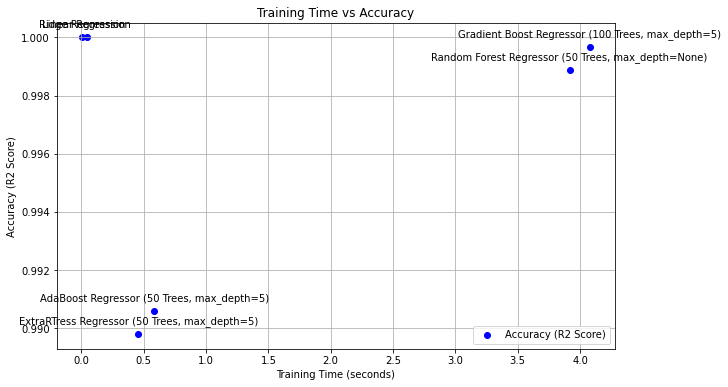

In [26]:
# Extract training times and accuracies from results
training_times = [result[1] for result in results]
accuracies = [result[4] for result in results]
model_names = [result[0] for result in results]

# Plot the graph
plt.figure(figsize=(10, 6))
plt.scatter(training_times, accuracies, marker='o', color='blue', label='Accuracy (R2 Score)')
plt.xlabel('Training Time (seconds)')
plt.ylabel('Accuracy (R2 Score)')
plt.title('Training Time vs Accuracy')
plt.grid(True)

# Annotate points with model names
for i, model_name in enumerate(model_names):
    plt.annotate(model_name, (training_times[i], accuracies[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.legend(loc='lower right')
plt.show()

## Assesment of timing during real world scenarios

In [31]:
# Measure inference time for each model on a single sample
sample = X_test[0:1, :]  # Use a single sample for timing

for name, model in model_configs:
    model.fit(X_train, y_train)  # Ensure the model is trained
    
    # Measure inference time
    start_time = time.time()
    model.predict(sample)  # Make a prediction on one sample
    end_time = time.time()
    
    inference_time = end_time - start_time
    print(f"{name} - Inference Time per Sample: {inference_time:.6f} seconds")

ExtraRTress Regressor (100 Trees, max_depth=5) - Inference Time per Sample: 0.003903 seconds
Random Forest Regressor (100 Trees, max_depth=None) - Inference Time per Sample: 0.003856 seconds
Gradient Boost Regressor (100 Trees, max_depth=5) - Inference Time per Sample: 0.000664 seconds
AdaBoost Regressor (100 Trees, max_depth=5) - Inference Time per Sample: 0.001392 seconds
Linear Regression - Inference Time per Sample: 0.000102 seconds
Ridge Regression - Inference Time per Sample: 0.000192 seconds


After evaluating several models while employing different parameters we found that the ExtraTrees Regressor is the best model for forecasting peak wind speeds in a tropical cyclone. Despite not having the highest $R^2$ value, the observations was comparable to the other models and it produced results quicker than the other models. The ExtraTress Regressor was slower at producing individual results, however, the difference was not that significant. It should be mentioned that a model of this nature would be computationally intensive since it carries a significant memory load. This may become an issue when these models are scaled up.

### Bagging